<a href="https://colab.research.google.com/github/ProgrammerDavid1/Data-Analysis/blob/main/Kagge_Netflix_Stock_Data%20from%202010%20to%202024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서론

- 데이터: 넷플릭스 2010년부터 2024년까지의 주식 데이터

- 데이터 선택 이유: 평소에 넷플릭스를 자주 애용하고 시청하는 시청자로써, 다른 OTT 플랫폼인 티빙, 디즈니플러스, 쿠팡플레이 등 은 전혀 사용하지 않고 오직 넷플릭스만을 이용한다. 이에 따라 제목을 보자마자 굉장히 흥미가 갔고 끌림이 있어서 이 주제로 선택을 하게 되었다.

- 데이터 분석 목표: 미래에 데이터 분석 쪽에서 내가 일해도 괜찮을지 또한 적성에 맞을지도 확인해보고 싶다. 이번 과제에 진심을 다해서 데이터를 분석해볼 예정이다

# 데이터 파악

먼저, 넷플릭스 데이터 속성 정보는 아래와 같다
- Date: 거래 날짜
- Adj_Close: 주식 분할, 배당금 등 조정 사항을 반영한 Netflix 주식의 조정 후 종가
- Close: 각 거래일의 Netflix 주식의 실제 종가
- High: 거래일 동안 Netflix 주식이 도달한 최고 가격
- Low: 거래일 동안 Netflix 주식이 도달한 최저 가격
- Open: 거래 시작 시 Netflix 주식의 가격
- Volume: 거래일 동안 거래된 총 주식 수

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽기
file_path = 'Netflix_Data.csv'
net_data = pd.read_csv(file_path)

# 데이터 구조 확인
print(net_data.shape) # 몇 행, 몇 열인지 확인
print("\n")
print(net_data.head)  # 첫 5행 출력
print("\n")

(3735, 8)


<bound method NDFrame.head of       Unnamed: 0                       Date   Adj_Close       Close  \
0              0  2010-01-04 00:00:00+00:00    7.640000    7.640000   
1              1  2010-01-05 00:00:00+00:00    7.358571    7.358571   
2              2  2010-01-06 00:00:00+00:00    7.617143    7.617143   
3              3  2010-01-07 00:00:00+00:00    7.485714    7.485714   
4              4  2010-01-08 00:00:00+00:00    7.614286    7.614286   
...          ...                        ...         ...         ...   
3730        3730  2024-10-29 00:00:00+00:00  759.440002  759.440002   
3731        3731  2024-10-30 00:00:00+00:00  753.739990  753.739990   
3732        3732  2024-10-31 00:00:00+00:00  756.030029  756.030029   
3733        3733  2024-11-01 00:00:00+00:00  756.099976  756.099976   
3734        3734  2024-11-04 00:00:00+00:00  755.510010  755.510010   

            High         Low        Open    Volume  
0       7.961429    7.565714    7.931429  17239600  

In [3]:
net_data.columns

Index(['Unnamed: 0', 'Date', 'Adj_Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')

# 데이터 특성 파악

- 각 값의 정보와 결측치 확인한다(통계정보 등등)

In [4]:
net_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3735 non-null   int64  
 1   Date        3735 non-null   object 
 2   Adj_Close   3735 non-null   float64
 3   Close       3735 non-null   float64
 4   High        3735 non-null   float64
 5   Low         3735 non-null   float64
 6   Open        3735 non-null   float64
 7   Volume      3735 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 233.6+ KB


In [5]:
# 결측치 확인
missing_value = net_data.isnull().sum()
print(missing_value)

Unnamed: 0    0
Date          0
Adj_Close     0
Close         0
High          0
Low           0
Open          0
Volume        0
dtype: int64


- 운이 좋게 결측치가 없는 것을 확인했다
- 결측치가 있었으면 dropna()로 결측치를 제거한 후, 중앙값이나 평균값으로 결측치를 대체했었을 예정
- 이제 다음 단계인 데이터 타입 변환을 진행한다

- 데이터의 date 열을 datetime 형식으로 변환한다

In [6]:
# 날짜 데이터 타입 변환
net_data['Date'] = pd.to_datetime(net_data['Date'])

# 데이터 정보 확인
print("데이터 정보:\n")
print(net_data.info())

# 데이터의 첫 5개 행 출력
print("\n\n데이터의 첫 5개 행:\n")
print(net_data.head())

데이터 정보:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  3735 non-null   int64              
 1   Date        3735 non-null   datetime64[ns, UTC]
 2   Adj_Close   3735 non-null   float64            
 3   Close       3735 non-null   float64            
 4   High        3735 non-null   float64            
 5   Low         3735 non-null   float64            
 6   Open        3735 non-null   float64            
 7   Volume      3735 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 233.6 KB
None


데이터의 첫 5개 행:

   Unnamed: 0                      Date  Adj_Close     Close      High  \
0           0 2010-01-04 00:00:00+00:00   7.640000  7.640000  7.961429   
1           1 2010-01-05 00:00:00+00:00   7.358571  7.358571  7.657143   
2           2 2010-01-06 00:00:00+00

- 구체적인 분석을 위해 필요한 데이터만 필터링 (일단 전체 데이터 다 필터링)

In [7]:
# 필요없는 칼럼 확인
columns_to_keep = ['Date','Adj_Close','High','Low','Open','Volume']

# 필요한 칼럼만 추출
filtered_data = net_data[columns_to_keep]

# 데이터 정보 확인
print("필터링 된 데이터 정보:\n")
print(filtered_data.info())

# 데이터의 첫 5개 행 출력
print("\n필터링 된 데이터의 첫 5개 행:\n")
print(filtered_data.head())

필터링 된 데이터 정보:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       3735 non-null   datetime64[ns, UTC]
 1   Adj_Close  3735 non-null   float64            
 2   High       3735 non-null   float64            
 3   Low        3735 non-null   float64            
 4   Open       3735 non-null   float64            
 5   Volume     3735 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 175.2 KB
None

필터링 된 데이터의 첫 5개 행:

                       Date  Adj_Close      High       Low      Open    Volume
0 2010-01-04 00:00:00+00:00   7.640000  7.961429  7.565714  7.931429  17239600
1 2010-01-05 00:00:00+00:00   7.358571  7.657143  7.258571  7.652857  23753100
2 2010-01-06 00:00:00+00:00   7.617143  7.672857  7.197143  7.361429  23290400
3 2010-01-07 00:00:00+00:00   7.485714  7.757

- describe() 메소드를 사용하여 데이터의 기본 통계 정보를 확인해보자

- seaborn의 pairplot을 사용하여 각 변수 간의 관계를 시각적으로 비교해보자

기본 통계 정보:

         Adj_Close         High          Low         Open        Volume
count  3735.000000  3735.000000  3735.000000  3735.000000  3.735000e+03
mean    227.179696   230.506997   223.687678   227.139568  1.676829e+07
std     202.468867   205.113534   199.770444   202.502359  1.975776e+07
min       7.018571     7.178571     6.931429     6.960000  1.144000e+06
25%      43.307858    44.030714    42.763571    43.145714  5.388100e+06
50%     156.449997   157.850006   154.550003   156.100006  1.022070e+07
75%     368.595001   374.910004   362.599991   369.410004  2.112530e+07
max     772.070007   773.000000   761.119995   765.760010  3.155418e+08




<Figure size 1200x800 with 0 Axes>

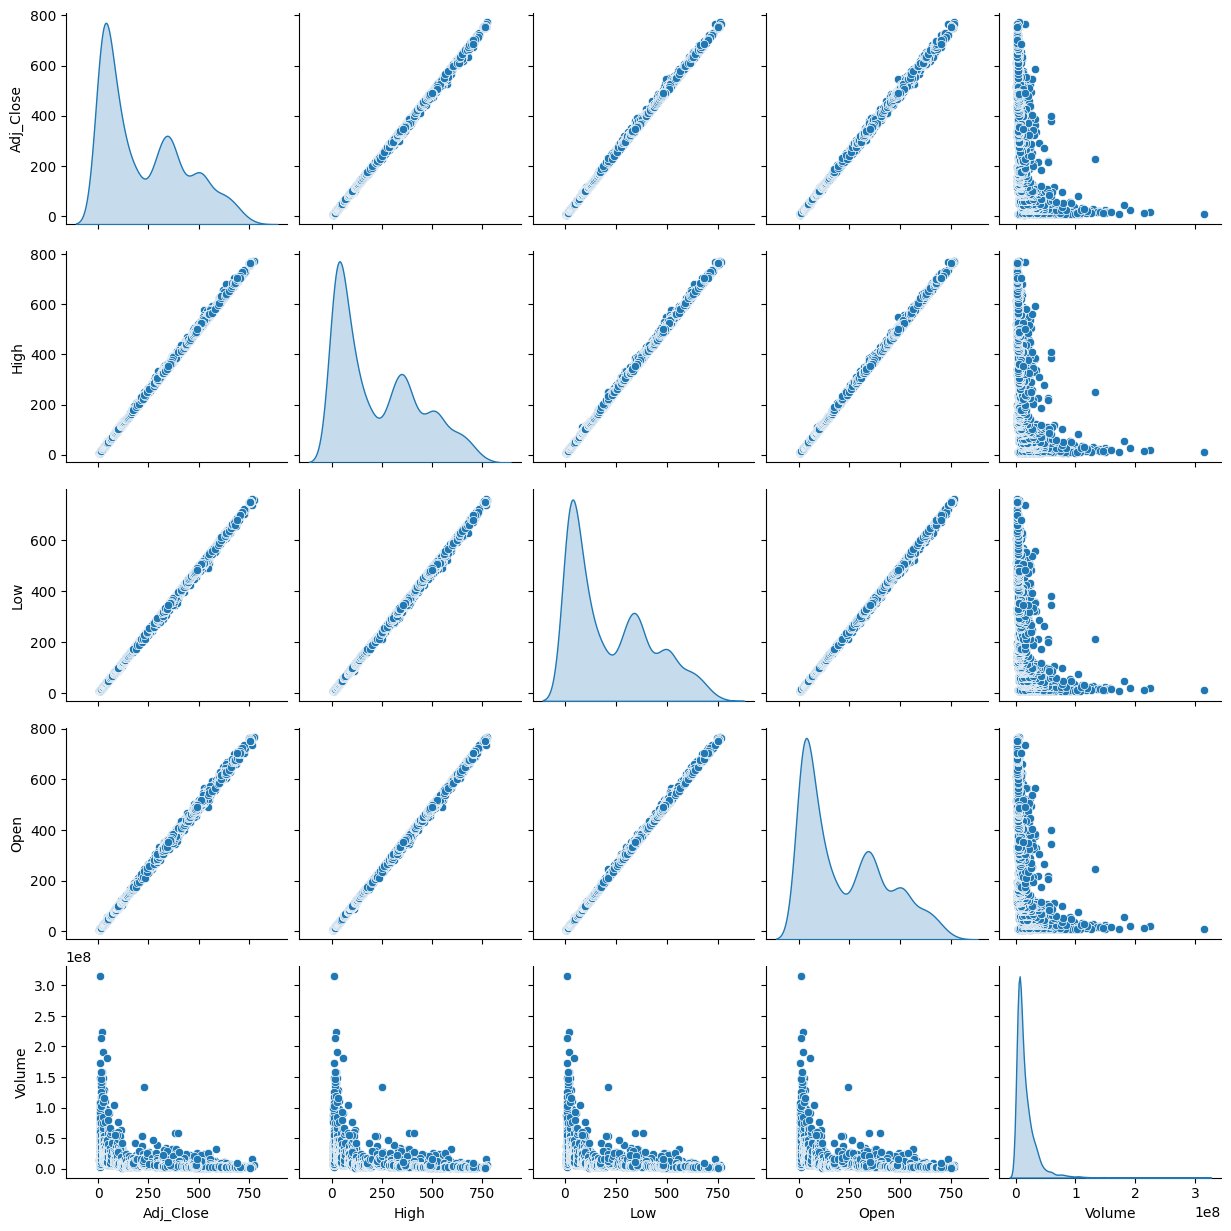

In [8]:
# 데이터 통계 정보 확인
stats_info = filtered_data.describe()

# 각 통계 정보 출력
print("기본 통계 정보:\n")
print(stats_info)
print("\n")

# 데이터 시각화 준비
plt.figure(figsize=(12,8))

# 각 칼럼 별 분포를 시각화
sns.pairplot(filtered_data, diag_kind = 'kde')
# diag_kind는 seaborn.pairplot 함수의 옵션 중 하나로, 대각선 (diagonal) 부분에 대한 히스토그램 대신 커널 밀도 추정 (Kernel Density Estimate, KDE)을 사용하게 된다
# 원래는 대각선 부분이 히스토그램으로 나오나, kde로 설정하여 커널 밀도 추정을 사용하고, 이는 데이터를 분포 모양에 대해 더 부드럽게 시각화하며, 밀도가 높을수록 데이터가 밀집되어 있음을 나타낸다.

**분석된 시각화 결과**
1. 변수 간의 관계
- Adj_Close, High, Low, Open 변수는 거의 선형적 관계를 보이고 있다.
- 이것은 즉 주식 가격의 최곳가, 최저가, 시작가와 종료가가 밀접하게 움직인다는 것을 의미한다
- 가격 관련 변수들이 양의 상관관계를 가진다.

2. Volume(거래량)
- 얘는 다른 변수들에 비해 비선형적인 관계를 보인다
- 거래량은 특정 구간에 집중 분포하고 있고, 주식 가격과의 직접적 패턴이 약하게 나타나고 있다.

3. 분포
- KDE를 통해 확인했을 때 Adj_Close와 다른 가격 변수들은 오른쪽으로 긴 꼬리를 가진 분포를 나타내고 있다.
--> 즉 이는 시간이 지남에 따라 넷플릭스 주가가 전반적으로 상승했다는 것을 알 수 있다.

다음 단계는 상관관계 히트맵으로 각 변수 간의 상관관계를 더 명확하게 확인해보겠다

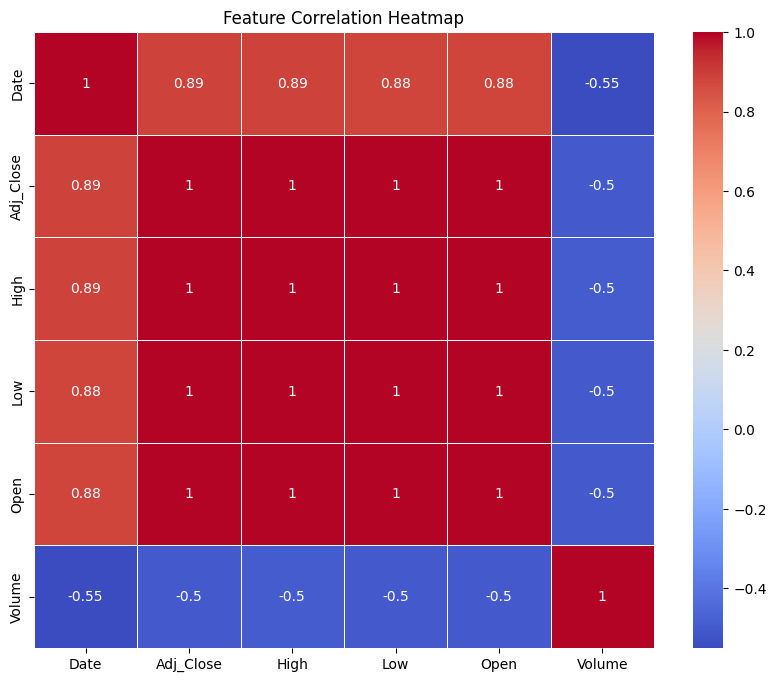

In [9]:
# 상관 관계 계산
correlation = filtered_data.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap = 'coolwarm', linewidth = 0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

분석된 히트맵 결과
1. 가격 관련 변수들(Adj_Close, High, Low, Open)
- 모두 강한 양의 상관간계를 보이고 있다. (상관계수가 1!)
--> 즉 이는 넷플릭스의 주식 가격의 고가, 저가, 시가, 종가가 거의 동일하게 움직인다는 것을 알 수 있다.

2. Volume(거래량)
- 얘가 좀 다른 변수들과 달리 양의 상관관계가 아닌 음의 상관관계를 보인다(-0.5)
--> 즉 거래량이 증가할 때 가격이 소폭 하락하는 패턴을 보인다는 것을 알 수 있다. 하지만 그렇게 강하지는 않으므로 반드시 이렇다고 말하기는 힘들다

3. Date(날짜)
- Date와 다른 가격 변수와의 상관관계는 약 0.88~0.89입니다.
--> 즉 이는 시간이 지남에 따라 주가가 점진적으로 전반적으로 상승해왔다는 것을 알 수 있다.

다음 단계는 머신러닝 모델링 준비를 해보겠다
- 데이터를 학습용과 테스트용으로 나누고, 회귀 모델을 통해 주식 가격 예측을 수행

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature와 Target 설정
X = filtered_data[['High','Low','Open','Volume']]   # 입력 변수
Y = filtered_data['Adj_Close']   # 타겟 변수(종가 예측)

# 학습용 데이터와 테스트용 데이터 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# LinearRegression 모델 훈련
model = LinearRegression()
model.fit(X_train,Y_train)

# 예측 수행
Y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 7.05
R-squared: 1.00


- 결과를 보면 R-squared 값이 1.00이 나왔는데, 1.00이라는 것은 모델이 데이터를 완벽하게 설명하고 있다는 의미.
- 동시에 **Mean Squared Error (MSE)**가 매우 낮은 7.04로 나왔는데, 이런 결과는 보통 다음 두 가지 상황 중 하나이다.

분석
1. 데이터의 완벽한 선형 관계
- 가격 관련 변수(High, Low, Open, Adj_Close)들이 거의 동일하게 움직이는 강한 선형 관계를 가지고 있기 때문.
- 이는 이미 히트맵에서 확인되었듯이 가격 관련 변수 간의 상관계수가 모두 1에 가까운 값을 보인 것과 일치.
--> 따라서 Linear Regression이 이 데이터를 완벽하게 예측한 결과로 보인다.


2. 모델에 데이터 누수가 있을 수 있음
- 입력 변수(High, Low, Open)가 **목표 변수(Adj_Close)**와 매우 유사하거나 중복된 정보를 제공하고 있다.
- 이럴 경우 모델이 학습 데이터에 과적합될 가능성이 크다고 볼 수 있다.

다음 단계로 넘어가 보겠다.
다음 단계는 이제 이러한 데이터 누수에 대한 과적합 여부를 검증하고, 모델의 일반화 성능을 더 정확히 평가하기 위해서 모델을 개선해보겠다

- 고민하다가 새로운 시도로 새로운 변수 생성 및 모델을 재학습시켜보겠다

In [20]:
# 새로운 Feature 생성
filtered_data['High_Low_Diff'] = filtered_data['High'] - filtered_data['Low']
filtered_data['MA_5'] = filtered_data['Adj_Close'].rolling(window = 5).mean() # 5일 이동 평균선

# 결측치 제거
filtered_data = filtered_data.dropna()

# Feature와 Target 설정
X = filtered_data[['High_Low_Diff', 'Volume','MA_5']]  # 새로운 Feature 사용
Y = filtered_data['Adj_Close']

# Train-Test Split
X_train,X_test,Y_train,_Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

# LinearRegression 모델 학습
model = LinearRegression()
model.fit(X_train,Y_train)

# 예측 및 평가
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# 결과 출력
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared (with new features): {r2:.2f}")

Mean Squared Error: 87646.45
R-Squared (with new features): -1.19


음... MSE가 새로운 변수를 만들기 전보다 크게 증가하고, R-squared 값이 음수로 나왔다..
이는 모델이 데이터를 잘 설명하고 있지 못하다는 의미이다

**문제의 원인**
1. 새로운 Feature의 성능 부족

- High_Low_Diff와 MA_5 같은 파생 변수들은 단순한 특징만을 반영해, Adj_Close(종가)를 정확히 설명하지 못한 것으로 보인다.
- 특히 이동평균선(MA_5)은 시계열 데이터 특성이 강한데, 이로 인해 모델이 미래 예측에 부적합했을거라는 생각

2. 데이터의 시계열 특성 미반영

- 기존의 Linear Regression 모델은 시간 순서를 고려하지 않았다
- 시계열 데이터는 과거의 데이터를 바탕으로 현재나 미래를 예측해야 하기 때문에 단순 선형 회귀는 한계가 있을 수 있다

3. Feature Scaling 문제

- Volume의 값은 다른 Feature보다 훨씬 크기 때문에 모델에 악영향을 미쳤을 수 있다.

**해결방안**
1. Feature Scaling(표준화/정규화)
- 데이터의 스케일을 조정하여 모델이 각 feature를 균등하게 학습할 수 있도록 해본다

2. 시계열 모델 적용
- 시계열 데이터에 적합한 모델을 사용하면 더 나은 성능을 기대해볼 수 있다

3. Feature 추가 개선
- 이동평균선 외에도 이전 날짜의 증가(시차 변수) 같은 시간 기반의 feature를 추가해본다

먼저 1번인 Featrue Scaling부터 적용해서 모델 성능을 개선해보겠다

In [21]:
from sklearn.preprocessing import StandardScaler

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test-Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size = 0.2, random_state = 42)

# LinearRegression 모델 학습
model = LinearRegression()
model.fit(X_train,Y_train)

# 예측 및 평가
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# 결과 출력
print(f"Mean Squared Error (with Scaling): {mse:.2f}")
print(f"R-squared (with Scaling): {r2:.2f}")

Mean Squared Error (with Scaling): 67.82
R-squared (with Scaling): 1.00


오 좋다! Feature Scaling을 적용하니 MSE는 67.82, R-squared는 다시 1.00으로 나왔다. 이 결과는 이전과 비슷하게 모델이 데이터를 거의 완벽하게 설명하고 있다는 의미이다.

**결론:**
- 데이터의 강한 선형 관계 덕분에 Linear Regression 모델이 매우 좋은 성능을 보여주고 있다.
- Feature Scaling을 적용했기 때문에 모든 입력 변수가 동일한 스케일에서 학습되었고, 모델이 안정적으로 동작했다.

이제 다음 단계인 시각화 및 인사이트 도출을 해보겠다

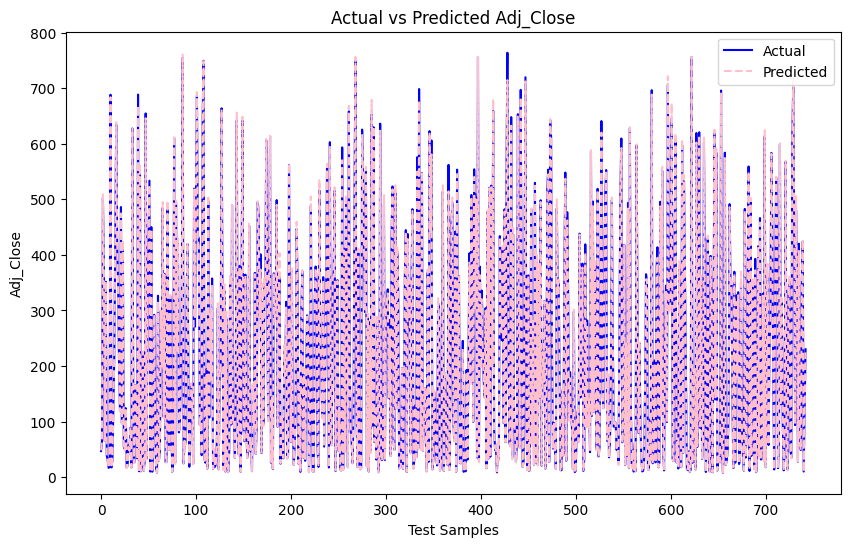

In [25]:
# 예측값과 실제값 비교
plt.figure(figsize=(10,6))
plt.plot(Y_test.values, label = "Actual", color = "blue")
plt.plot(Y_pred, label = "Predicted", color = "pink", linestyle = "--")
plt.title("Actual vs Predicted Adj_Close")
plt.xlabel("Test Samples")
plt.ylabel("Adj_Close")
plt.legend()
plt.show()

그래프를 보니 **Actual 값(실제 값)**과 **Predicted 값(예측 값)**이 거의 겹쳐 움직이고 있는 것을 확인할 수 있다.
이를 바탕으로 다음과 같은 인사이트를 도출해볼 수 있다

**분석 및 인사이트**
1. 모델 성능:

- 예측값이 실제값과 매우 유사하게 겹치면서 움직이므로 모델이 데이터를 완벽하게 설명하고 있다는 것을 확인할 수 있다. 강한 선형 관계를 가진 데이터 특성 때문에 이렇게 생각해볼 수 있다. (상관계수 1.00)
- 특히 High, Low, Open 변수는 Adj_Close(종가)와 밀접하게 관련되어 있어 예측 성능이 높게 나온다.

2. 패턴의 일관성:

- 모든 테스트 샘플에서 예측값이 실제값과 거의 일치하는 것을 볼 수 있다.
- 이것은 즉 모델이 과거 데이터에 대해 매우 잘 학습되었음을 나타낸다.

3. 거래량(Volume)의 영향:

- 거래량(Volume)은 가격 변수들과 상대적으로 낮은 상관관계를 보였지만, 모델에 입력되었을 때 예측 결과에 큰 오류를 일으키지 않았다.
-->다른 말로 이것은 **주식 가격의 변동은 주로 가격 관련 변수(High, Low, Open)**에 의해 설명된다는 것을 시사한다.

4. 한계점:

- 모델이 과거 데이터를 학습한 것이므로 새로운 패턴이나 급격한 변화를 예측하는 데에는 한계가 있을 수 있다. (지도 학습의 한계점)
- 또한 데이터의 시계열적 특성을 완전히 반영하지 않았으므로, 미래 예측을 위해서는 시계열 모델(ex: ARIMA, LSTM)을 사용하는 것이 더욱 적합할 수 있다.
- 그러나 이러한 시계열 모델은 내가 알기로는 딥러닝 모델이라 아직 배우지도 않았고, 많이 알지 못해 여기까지만 진행할 예정이다.


**과제 진행 요약 및 총정리**

1. 데이터 읽기 및 초기 탐색:
- 넷플릭스 주식 데이터를 로드하고 기본 통계 정보를 확인했다

2. 데이터 전처리:
- 날짜 형식을 변환하고, 필요 없는 컬럼을 제거해 필요한 데이터만 남겼다.

3. 데이터 시각화:
- Pairplot과 상관관계 히트맵을 통해 변수 간 관계를 분석하고 데이터의 패턴을 시각적으로 확인했다.

4. 머신러닝 모델 적용:
- Linear Regression 모델을 사용해 Adj_Close(종가)를 예측하고, Feature Scaling을 적용해 안정적인 모델 성능을 확보했다.
- MSE와 R-squared를 통해 모델이 데이터를 잘 설명하는지 확인했다

5. 결과 분석 및 시각화:
- 예측값과 실제값을 비교하는 그래프를 통해 모델의 성능을 시각적으로 평가했다.
